# <div class="alert alert-info" style="text-align: center;" markdown="1">Statistical Machine Learning</div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## `K-Nearest Neighbors (KNN)`

K-Nearest Neighbors (KNN) is a simple algorithm that stores all available cases and classifies new cases based on a similarity measure (e.g., distance functions).

#### Algorithm

1. Find K records that have similar features.
2. For classification, find out the majority class among these records and assign the class to the new record.
3. For regression, find out the average of these records and assign the value to the new record.

In [2]:
df_loan = pd.read_csv('data/loan_data.csv.gz')
df_loan.head()

,Unnamed: 0,status,loan_amnt,term,annual_inc,dti,payment_inc_ratio,revol_bal,revol_util,purpose,...,delinq_2yrs_zero,pub_rec_zero,open_acc,grade,outcome,emp_length,purpose_,home_,emp_len_,borrower_score
0,1,Charged Off,2500,60 months,30000,1.00,2.39320,1687,9.4,car,...,1,1,3,4.8,default,1,major_purchase,RENT,> 1 Year,0.65
1,2,Charged Off,5600,60 months,40000,5.55,4.57170,5210,32.6,small_business,...,1,1,11,1.4,default,5,small_business,OWN,> 1 Year,0.80
2,3,Charged Off,5375,60 months,15000,18.08,9.71600,9279,36.5,other,...,1,1,2,6.0,default,1,other,RENT,> 1 Year,0.60
3,4,Charged Off,9000,36 months,30000,10.08,12.21520,10452,91.7,debt_consolidation,...,1,1,4,4.2,default,1,debt_consolidation,RENT,> 1 Year,0.50
4,5,Charged Off,10000,36 months,100000,7.06,3.90888,11997,55.5,other,...,1,1,14,5.4,default,4,other,RENT,> 1 Year,0.55


In [4]:
df_loan.columns

Index(['Unnamed: 0', 'status', 'loan_amnt', 'term', 'annual_inc', 'dti',
       'payment_inc_ratio', 'revol_bal', 'revol_util', 'purpose',
       'home_ownership', 'delinq_2yrs_zero', 'pub_rec_zero', 'open_acc',
       'grade', 'outcome', 'emp_length', 'purpose_', 'home_', 'emp_len_',
       'borrower_score'],
      dtype='object')

In [5]:
predictors = ['payment_inc_ratio', 'dti']
target = 'outcome'

In [7]:
new_loan = df_loan.loc[0:0, predictors]
X = df_loan.loc[1:, predictors]
y = df_loan.loc[1:, target]

In [15]:
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)
knn.predict(new_loan)

array(['paid off'], dtype=object)

In [16]:
df_loan.loc[0:0, target]

0    default
Name: outcome, dtype: object

### Distance Metrics

- Similarity between two data points is calculated using distance metrics.

- Common distance metrics are:
    - Euclidean Distance
    - Manhattan Distance
    - Minkowski Distance
    - Hamming Distance
    - Cosine Similarity
    - Mahalanobis Distance

#### Euclidean Distance

- Euclidean distance is the most commonly used distance metric.

- It is the square root of the sum of the squared differences between the two vectors.

$D(p, q) = \sqrt{\sum_{i=1}^{n} (q_i - p_i)^2}$

#### Manhattan Distance

- Manhattan distance is the sum of the absolute differences between the two vectors.

$D(p, q) = \sum_{i=1}^{n} |q_i - p_i|$

### Standardization

In [24]:
predictors = ['payment_inc_ratio', 'dti', 'revol_bal', 'revol_util']
X = df_loan[predictors]
y = df_loan[target]

model_std = KNeighborsClassifier(n_neighbors=5)
model_std.fit(X, y)

KNeighborsClassifier()

In [26]:
new_loan = df_loan.loc[0:0, predictors]
model_std.predict(new_loan)

array(['paid off'], dtype=object)

In [28]:
nbrs = model_std.kneighbors(new_loan)
X.iloc[nbrs[1][0], :]

,payment_inc_ratio,dti,revol_bal,revol_util
0,2.39320,1.00,1687,9.4
35536,1.47212,1.46,1686,10.0
33651,3.38178,6.37,1688,8.4
25863,2.36303,1.39,1691,3.5
42953,1.28160,7.14,1684,3.9


In [29]:
from sklearn.discriminant_analysis import StandardScaler


scaler = StandardScaler()
scaler.fit(X)

X_scaled = scaler.transform(X)
new_loan_scaled = scaler.transform(new_loan)

In [30]:
model_scaled = KNeighborsClassifier(n_neighbors=5)
model_scaled.fit(X_scaled, y)

KNeighborsClassifier()

In [31]:
model_scaled.predict(new_loan_scaled)

array(['default'], dtype=object)

In [32]:
nbrs = model_scaled.kneighbors(new_loan_scaled)
X.iloc[nbrs[1][0], :]

,payment_inc_ratio,dti,revol_bal,revol_util
0,2.39320,1.00,1687,9.4
2080,2.61091,1.03,1218,9.7
1438,2.34343,0.51,278,9.9
30215,2.71200,1.34,1075,8.5
28542,2.39760,0.74,2917,7.4


### Choosing the Value of K

- The value of K is a hyperparameter that needs to be tuned.

- A small value of K means that noise will have a higher influence on the result.

- A large value makes it computationally expensive.


## `Tree-Based Models`

- Tree-based models are simple if-else decision rules that are easy to interpret.

### Decision Trees Classifier

In [93]:
predictors = ['payment_inc_ratio', 'borrower_score']
X = df_loan[predictors]
y = df_loan[target]

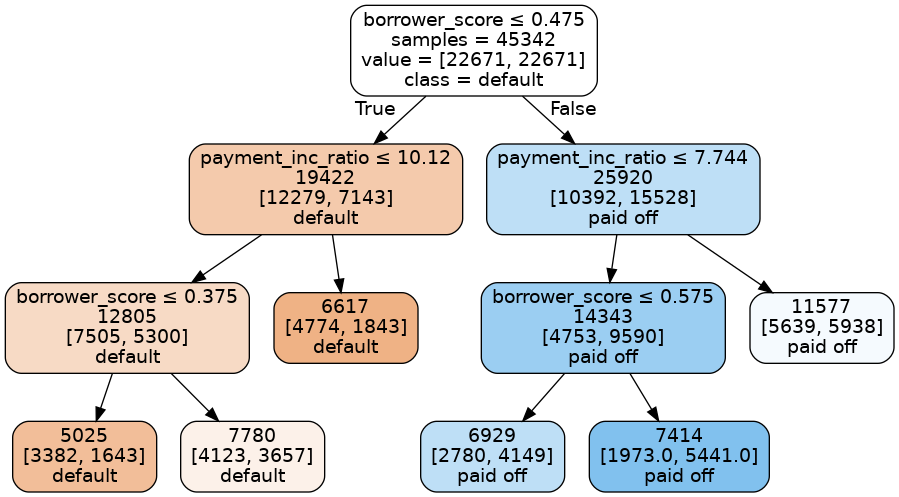

In [42]:
from sklearn.tree import DecisionTreeClassifier
from dmba.graphs import plotDecisionTree, textDecisionTree

model_dt = DecisionTreeClassifier(random_state=42, criterion='entropy', min_impurity_decrease=0.003)
model_dt.fit(X, y)

plotDecisionTree(model_dt, feature_names=predictors, class_names=model_dt.classes_)

In [46]:
print(textDecisionTree(model_dt))

node=0 test node: go to node 1 if 1 <= 0.4749999940395355 else to node 6
  node=1 test node: go to node 2 if 0 <= 10.119699954986572 else to node 5
    node=2 test node: go to node 3 if 1 <= 0.375 else to node 4
      node=3 leaf node: [[0.673, 0.327]]
      node=4 leaf node: [[0.53, 0.47]]
    node=5 leaf node: [[0.721, 0.279]]
  node=6 test node: go to node 7 if 0 <= 7.744104862213135 else to node 10
    node=7 test node: go to node 8 if 1 <= 0.5750000178813934 else to node 9
      node=8 leaf node: [[0.401, 0.599]]
      node=9 leaf node: [[0.266, 0.734]]
    node=10 leaf node: [[0.487, 0.513]]


### The Recursive Partitioning Algorithm

Let's supppose $X_1, X_2, ..., X_p$ represent the predictor variables and $Y$ represent the target variable.

1. For each predictor $X_j$:
    a. For each value $s_j$ of $X_j$:
        i. Split the record in A with $X_j \le s_j$ as one partition and remaining records with $X_j >= s_j$ in another partion.
        ii. Measure the homogeneity of the class within each subpartition.
    b. Select the value of $s_j$ that produces maximum within partition homogeneity.
2. Select the predictor $X_j$ and the split value $s_j$that produces the maximum within partion homogeneity of class.

- Recursive part:

    1. Initialize A with all records.
    2. Apply the partitioning step to split A into two subpartitions A1 and A2.
    3. Repeat the partitioning step on subpartitions A1 and A2.
    4. Stop partitioning when the stopping criteria are met (e.g. - further partions do not improve the homogeneity in that partition). 

### Measuring Homogeneity or Impurity

- Gini Impurity

$I(A) = p(1 - p)$

- Entropy

$E(A) = -p \log_2 p - (1 - p) \log_2 (1 - p)$



### Stopping Criteria

If we do not stop the recursive partitioning, the tree will become too complex and overfit the data. Fully grown tree resullts in completely pure leaves, and hence 100% accuracy on the training data. **However, it will not generalize well to the test data.**

- Common stopping criteria are:

    - Maximum depth of the tree
    - Minimum number of records in the leaf node
    - Minimum impurity decrease
    

### Predicting Continuous Target Variable

- Predicting continuous target variable using decision trees is similar to classification.
- The only difference is that the impurity measure is different.
    - The impurity measure used for regression is squared deviation from the mean.
    - Prediction performance is measured using Root Mean Squared Error (RMSE).

## `Bagging and The Random Forest`

### Ensemble Learning

- Ensemble learning is a machine learning paradigm where multiple models (often called "weak learners") are trained to solve the same problem and combined to get better results.

- Method:
    - Train a model and record its predictions.
    - Repeat the process with different models on same data.
    - For each record, calculate the average (majority vote) of the predictions.


### Bagging

- Bagging (Bootstrap Aggregating) is an ensemble learning technique that combines multiple models to get a better result.

- Method:
    - Initialize M, the number of models to be trained and n, the number of records to choose from the training data. Set iteration  m=1.
    - Take a bootstrap resample (with replacement) of n records from the training data.
    - Train the model on the bootstrap sample.
    - Repeat the process for M models.
    - Bagged estimate is given by:

        $\hat{f} = \frac{1}{M} \sum_{m=1}^{M} \hat{f}_{m}(x)$


### Random Forest

- Random Forest is an ensemble learning technique that combines multiple decision trees to get a better result.

- Method:

    1. Tae a bootstrap resample (with replacement) of n records from the training data.
    2. For the first split, sample p < P predictors at random without replacement.
    3. For each of the sample variables apply the recursive partitioning algorithm to find the best split.
    4. Select the variable and split value that produces the maximum within partition homogeneity.
    5. Repeat the process for M trees.
    6. Tae another bootstrap resample (with replacement) of n records from the training data and repeat the process.

In [47]:
predictors = ['payment_inc_ratio', 'borrower_score']
target = 'outcome'

X = df_loan[predictors]
y = df_loan[target]

In [48]:
from sklearn.ensemble import RandomForestClassifier


model_rf = RandomForestClassifier(random_state=42, n_estimators=500, oob_score=True)
model_rf.fit(X, y)

RandomForestClassifier(n_estimators=500, oob_score=True, random_state=42)

In [51]:
model_rf.oob_score_

0.553989678443827

In [52]:
predictions = X.copy()
predictions['predicted'] = model_rf.predict(X)
predictions.head()

,payment_inc_ratio,borrower_score,predicted
0,2.39320,0.65,default
1,4.57170,0.80,default
2,9.71600,0.60,default
3,12.21520,0.50,default
4,3.90888,0.55,default


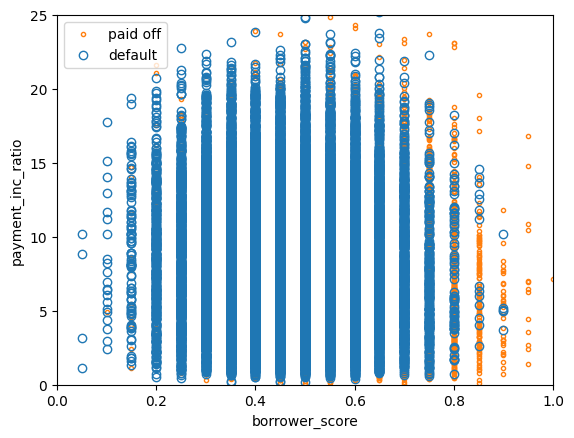

In [54]:
fi, ax = plt.subplots()

predictions.loc[predictions.predicted == "paid off"].plot(x='borrower_score', y='payment_inc_ratio', style='.', markerfacecolor='none', markeredgecolor="C1", ax=ax)
predictions.loc[predictions.predicted == "default"].plot(x='borrower_score', y='payment_inc_ratio', style='o', markerfacecolor='none', markeredgecolor="C0", ax=ax)

ax.legend(['paid off', 'default'])
ax.set_xlim(0, 1)
ax.set_ylim(0, 25)
ax.set_xlabel('borrower_score')
ax.set_ylabel('payment_inc_ratio')
plt.show()

### Variable Importance

- Variable importance is a measure of the contribution of each predictor variable in the model.
- Random Forest has ability to calculate variable importance automatically.

In [90]:
predictors_all = ['payment_inc_ratio', 'dti', 'revol_bal', 'revol_util', 'borrower_score', 'loan_amnt', 'term', 'emp_length', 'home_', 'annual_inc', 'purpose', 'grade', 'delinq_2yrs_zero', 'open_acc', 'pub_rec_zero', 'emp_len_']

X = pd.get_dummies(df_loan[predictors_all], drop_first=True)

In [59]:
model_rf_all = RandomForestClassifier(random_state=42, n_estimators=100)
model_rf_all.fit(X, y)

RandomForestClassifier(random_state=42)

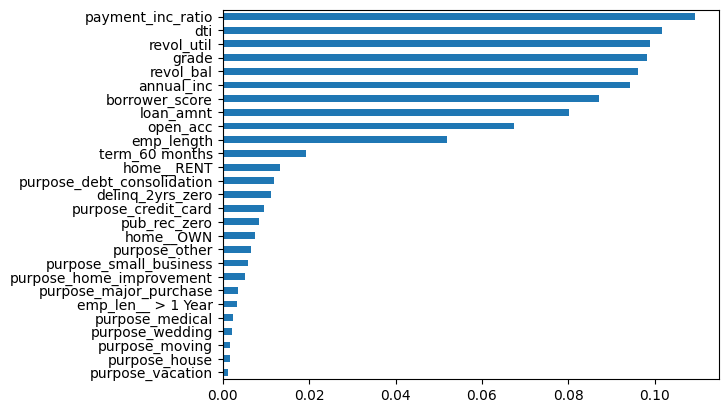

In [73]:
fi, ax = plt.subplots()
pd.Series(model_rf_all.feature_importances_, index=X.columns).sort_values().plot(kind='barh', ax=ax)
plt.show()

#### Hyperparameters of Random Forest

- Number of trees (n_estimators)
- Maximum depth of the tree (max_depth)
- Minimum size of terminal nodes (min_samples_leaf)
- Maximum nodes in the tree (max_leaf_nodes)
    - maxnodes = 2^(max_leaf_nodes) - 1

## `Boosting`

- Boosting is an ensemble learning technique that combines multiple models to get a better result.
- Boosting fits a series of models, in which each subsequent model tries to minimize the errors of the previous model.

- Boosting Algorithm (AdaBoost):

    1. Initialize M, the maximum number of models to be trained, and set the iteration m=1. Initialize the weights of the records as $w_i = 1/N$. Initialize the ensemble model as $\hat{f_0} = 0$.
    2. Using the weights $w_i$, train the model $\hat{f_m}$ that minimizes the weighted error $e_m$ defined by summing the weights of the misclassified records.
    3. Add the model to the ensemble model: $\hat{f_m} = \hat{f_{m-1}} + \alpha_m \hat{f_m}$, where $\alpha_m = \frac{\log 1 - e_m}{e_m}$.
    4. Update the weights $w_i$ so that the weights are increased for the records that are misclassified. The size of increase depends on $\alpha_m$, with larger values of $\alpha_m$ leading to larger increases in weights.
    5. Increament the model iteration m by 1. If m <= M, repeat the process.

- The boosted estimaation is given by:
    
$\hat{f} = \sum_{m=1}^{M} \alpha_m \hat{f_m}(x)$

### XGBoost

- Implementation of **Stocaistic Gradient Boosting** algorithm.


In [86]:
np.unique(y)

array([0])

In [94]:

from xgboost import XGBClassifier

model_xgb = XGBClassifier(random_state=42, objective='binary:logistic', subsample=0.63)
y = [1 if yi == 'paid off' else 0 for yi in y]
model_xgb.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

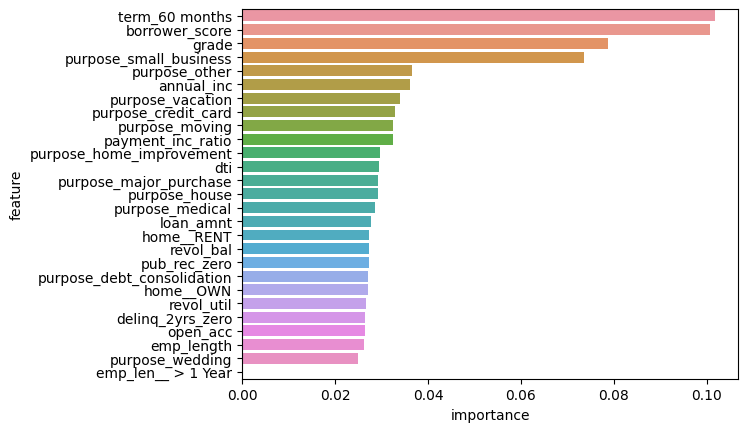

In [95]:
fig, ax = plt.subplots()

xgb_df = pd.DataFrame({'feature': X.columns, 'importance': model_xgb.feature_importances_})
xgb_df.sort_values('importance', ascending=False, inplace=True)
sns.barplot(x='importance', y='feature', data=xgb_df, ax=ax)
plt.show()

In [96]:
from sklearn.model_selection import train_test_split

train_X, valid_X, train_y , valid_y = train_test_split(X, y, test_size=0.3, random_state=42)

In [105]:
model_xgb_all = XGBClassifier(random_state=42, objective='binary:logistic', subsample=1, n_estimators=250, max_depth=6, learning_rate=0.3, reg_lambda=0)
model_xgb_all.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [106]:
predictions = model_xgb_all.predict_proba(valid_X)[:,1]
predictions

array([0.5009781 , 0.33594763, 0.36839855, ..., 0.7037026 , 0.5525504 ,
       0.34945795], dtype=float32)

In [107]:
error_val = abs(valid_y - predictions)
print('Mean Absolute Error:', np.mean(error_val))

error_train = abs(train_y - model_xgb_all.predict_proba(train_X)[:,1])
print('Mean Absolute Error:', np.mean(error_train))

Mean Absolute Error: 0.40814630705457755
Mean Absolute Error: 0.2678221020292926


In [103]:
model_xgb_penalty = XGBClassifier(random_state=42, objective='binary:logistic', subsample=0.63, n_estimators=250, max_depth=6, learning_rate=0.1, reg_lambda=1000)
model_xgb_penalty.fit(train_X, train_y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=250, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)

In [108]:
error_val = abs(valid_y - model_xgb_penalty.predict_proba(valid_X)[:,1])
print('Mean Absolute Error:', np.mean(error_val))

error_train = abs(train_y - model_xgb_penalty.predict_proba(train_X)[:,1])
print('Mean Absolute Error:', np.mean(error_train))

Mean Absolute Error: 0.4169358095437746
Mean Absolute Error: 0.4109133848459014


In [109]:
results = []
for i in range(1, 250):
    train_default = model_xgb_all.predict_proba(train_X, ntree_limit=i)[:,1]
    train_penalty = model_xgb_penalty.predict_proba(train_X, ntree_limit=i)[:,1]
    pred_defaut = model_xgb_all.predict_proba(valid_X, ntree_limit=i)[:,1]
    pred_penalty = model_xgb_penalty.predict_proba(valid_X, ntree_limit=i)[:,1]
    results.append({
        'iteration': i,
        'train_default': np.mean(abs(train_y - train_default) > 0.5),
        'train_penalty': np.mean(abs(train_y - train_penalty) > 0.5),
        'valid_default': np.mean(abs(valid_y - pred_defaut) > 0.5),
        'valid_penalty': np.mean(abs(valid_y - pred_penalty) > 0.5)
    })

results_df = pd.DataFrame(results)
results_df.head()

/home/rishabh/anaconda3/lib/python3.9/site-packages/xgboost/core.py:122: UserWarning: ntree_limit is deprecated, use `iteration_range` or model slicing instead.
  warnings.warn(


,iteration,train_default,train_penalty,valid_default,valid_penalty
0,1,0.341284,0.339582,0.350070,0.348453
1,2,0.332210,0.337818,0.341763,0.346100
2,3,0.326412,0.340590,0.339410,0.347056
3,4,0.323451,0.336904,0.338308,0.343527
4,5,0.318756,0.341095,0.335073,0.343233


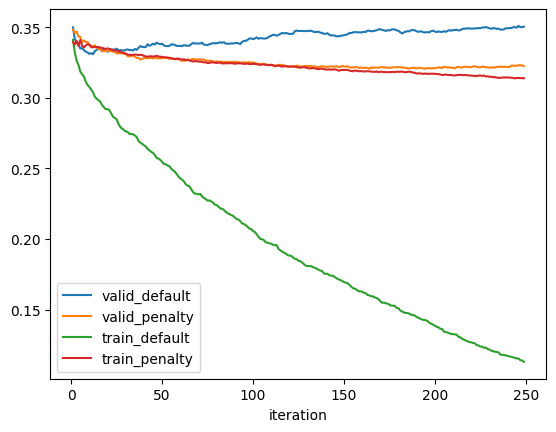

In [110]:
ax = results_df.plot(x='iteration', y='valid_default' )
results_df.plot(x='iteration', y='valid_penalty', ax=ax)
results_df.plot(x='iteration', y='train_default', ax=ax)
results_df.plot(x='iteration', y='train_penalty', ax=ax)
plt.show()